In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from scipy.spatial.distance import pdist, squareform

In [8]:
sns.set_palette("husl")

def load_data():
    customers_df = pd.read_csv('data/Customers.csv')
    products_df = pd.read_csv('data/Products.csv')
    transactions_df = pd.read_csv('data/Transactions.csv')
    
    # Convert date columns to datetime
    customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
    transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])
    
    return customers_df, products_df, transactions_df

def basic_eda(customers_df, products_df, transactions_df):
    print("Basic EDA Summary:")
    print("\nCustomers Dataset:")
    print(f"Number of unique customers: {len(customers_df)}")
    print("\nRegion distribution:")
    print(customers_df['Region'].value_counts())
    
    print("\nProducts Dataset:")
    print(f"Number of unique products: {len(products_df)}")
    print("\nCategory distribution:")
    print(products_df['Category'].value_counts())
    
    print("\nTransactions Dataset:")
    print(f"Number of transactions: {len(transactions_df)}")
    print(f"Total revenue: ${transactions_df['TotalValue'].sum():,.2f}")
    print(f"Average transaction value: ${transactions_df['TotalValue'].mean():.2f}")

def plot_customer_trends(customers_df, transactions_df):
    # Customer signup trends
    plt.figure(figsize=(12, 6))
    customers_df['SignupDate'].dt.to_period('M').value_counts().sort_index().plot(kind='line')
    plt.title('Customer Signup Trends by Month')
    plt.xlabel('Month')
    plt.ylabel('Number of New Signups')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Transaction value distribution
    plt.figure(figsize=(12, 6))
    sns.histplot(data=transactions_df, x='TotalValue', bins=50)
    plt.title('Distribution of Transaction Values')
    plt.xlabel('Transaction Value ($)')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

def analyze_customer_behavior(customers_df, transactions_df):
    # Merge transactions with customers
    customer_transactions = transactions_df.merge(customers_df, on='CustomerID')
    
    # Customer purchase frequency
    purchase_frequency = customer_transactions.groupby('CustomerID').size()
    print("\nCustomer Purchase Behavior:")
    print(f"Average purchases per customer: {purchase_frequency.mean():.2f}")
    print(f"Median purchases per customer: {purchase_frequency.median():.2f}")
    
    # Customer lifetime value (CLV)
    customer_value = customer_transactions.groupby('CustomerID')['TotalValue'].sum()
    print(f"\nCustomer Lifetime Value:")
    print(f"Average CLV: ${customer_value.mean():.2f}")
    print(f"Median CLV: ${customer_value.median():.2f}")
    
    # Regional analysis
    regional_stats = customer_transactions.groupby('Region').agg({
        'TotalValue': ['count', 'sum', 'mean'],
        'CustomerID': 'nunique'
    })
    print("\nRegional Performance:")
    print(regional_stats)
    
    return purchase_frequency, customer_value

def analyze_product_performance(products_df, transactions_df):
    # Merge transactions with products
    product_transactions = transactions_df.merge(products_df, on='ProductID')
    
    # Product category performance
    category_performance = product_transactions.groupby('Category').agg({
        'TransactionID': 'count',
        'TotalValue': 'sum',
        'Quantity': 'sum'
    }).sort_values('TotalValue', ascending=False)
    
    category_performance['Average_Order_Value'] = category_performance['TotalValue'] / category_performance['TransactionID']
    
    print("\nProduct Category Performance:")
    print(category_performance)
    
    # Top selling products
    top_products = product_transactions.groupby('ProductName').agg({
        'Quantity': 'sum',
        'TotalValue': 'sum'
    }).sort_values('TotalValue', ascending=False).head(10)
    
    print("\nTop 10 Products by Revenue:")
    print(top_products)
    
    return category_performance, top_products

def temporal_analysis(transactions_df):
    # Add time-based columns
    transactions_df['Year'] = transactions_df['TransactionDate'].dt.year
    transactions_df['Month'] = transactions_df['TransactionDate'].dt.month
    transactions_df['DayOfWeek'] = transactions_df['TransactionDate'].dt.dayofweek
    
    # Monthly revenue trends
    monthly_revenue = transactions_df.groupby([transactions_df['TransactionDate'].dt.to_period('M')])['TotalValue'].sum()
    
    # Daily patterns
    daily_patterns = transactions_df.groupby('DayOfWeek')['TotalValue'].agg(['count', 'mean', 'sum'])
    daily_patterns.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    
    print("\nDaily Transaction Patterns:")
    print(daily_patterns)
    
    return monthly_revenue, daily_patterns

=== Basic EDA ===
Basic EDA Summary:

Customers Dataset:
Number of unique customers: 200

Region distribution:
Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64

Products Dataset:
Number of unique products: 100

Category distribution:
Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64

Transactions Dataset:
Number of transactions: 1000
Total revenue: $689,995.56
Average transaction value: $690.00

=== Customer Behavior Analysis ===

Customer Purchase Behavior:
Average purchases per customer: 5.03
Median purchases per customer: 5.00

Customer Lifetime Value:
Average CLV: $3467.31
Median CLV: $3137.66

Regional Performance:
              TotalValue                        CustomerID
                   count        sum        mean    nunique
Region                                                    
Asia                 218  152074.97  697.591606         44
Europe         

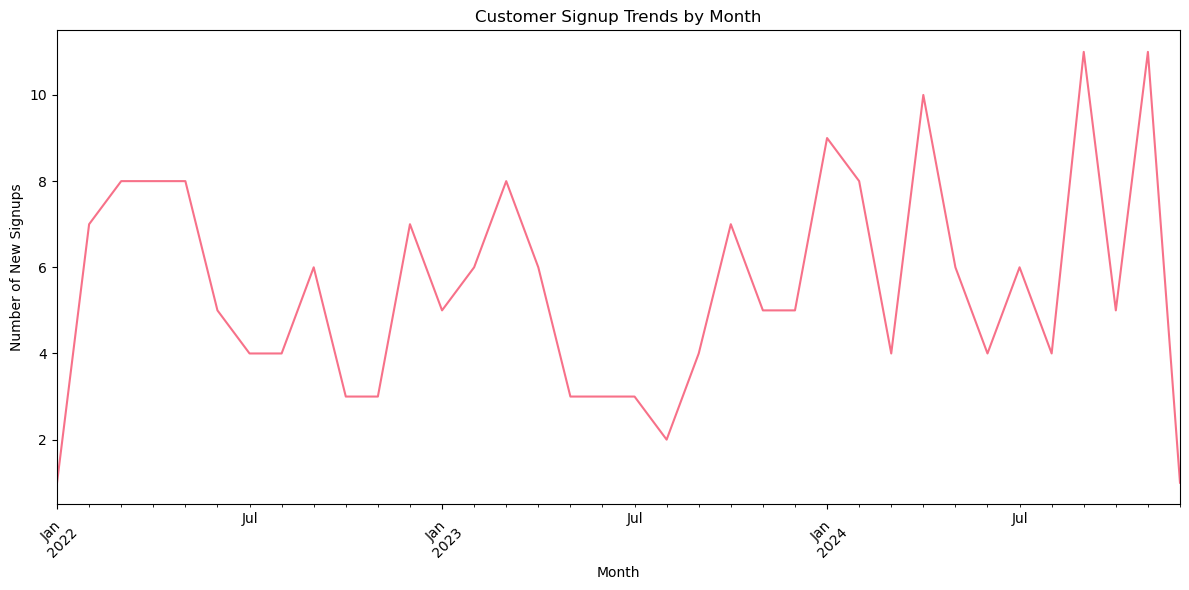

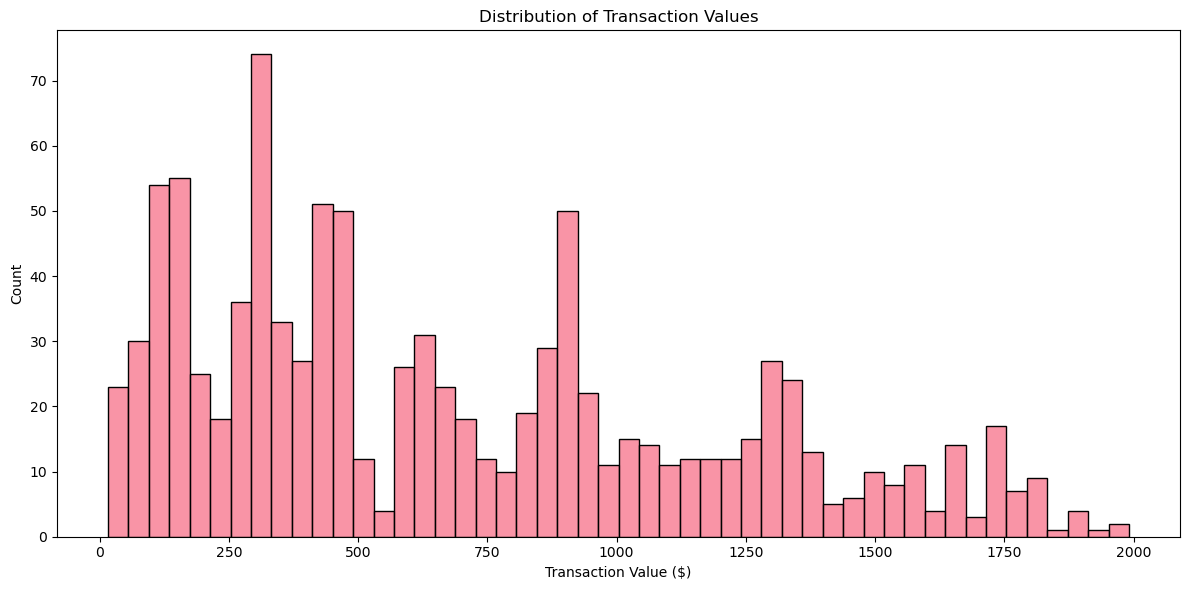

In [9]:
# Load data
customers_df, products_df, transactions_df = load_data()

# Perform basic EDA
print("=== Basic EDA ===")
basic_eda(customers_df, products_df, transactions_df)

# Analyze customer behavior
print("\n=== Customer Behavior Analysis ===")
purchase_freq, customer_value = analyze_customer_behavior(customers_df, transactions_df)

# Analyze product performance
print("\n=== Product Performance Analysis ===")
category_perf, top_products = analyze_product_performance(products_df, transactions_df)

# Perform temporal analysis
print("\n=== Temporal Analysis ===")
monthly_rev, daily_patterns = temporal_analysis(transactions_df)

# Plot customer trends
print("\n=== Visualization ===")
plot_customer_trends(customers_df, transactions_df)

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def create_report_visualizations(customers_df, products_df, transactions_df):
    # Set style
    # plt.style.use('seaborn')
    sns.set_palette("husl")
    
    # Create figure with multiple subplots
    fig = plt.figure(figsize=(15, 10))
    
    # 1. Regional Performance
    ax1 = plt.subplot(221)
    regional_data = transactions_df.merge(customers_df, on='CustomerID').groupby('Region')['TotalValue'].mean()
    regional_data.plot(kind='bar', ax=ax1)
    ax1.set_title('Average Transaction Value by Region')
    ax1.set_ylabel('Average Value ($)')
    plt.xticks(rotation=45)
    
    # 2. Category Performance
    ax2 = plt.subplot(222)
    category_data = transactions_df.merge(products_df, on='ProductID').groupby('Category')['TotalValue'].mean()
    category_data.plot(kind='bar', ax=ax2)
    ax2.set_title('Average Transaction Value by Category')
    ax2.set_ylabel('Average Value ($)')
    plt.xticks(rotation=45)
    
    # 3. Daily Patterns
    ax3 = plt.subplot(223)
    transactions_df['DayOfWeek'] = pd.to_datetime(transactions_df['TransactionDate']).dt.dayofweek
    day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    daily_avg = transactions_df.groupby('DayOfWeek')['TotalValue'].mean()
    daily_avg.index = day_names
    daily_avg.plot(kind='line', marker='o', ax=ax3)
    ax3.set_title('Average Transaction Value by Day of Week')
    ax3.set_ylabel('Average Value ($)')
    plt.xticks(rotation=45)
    
    # 4. Customer Signup Trends
    ax4 = plt.subplot(224)
    customers_df['SignupMonth'] = pd.to_datetime(customers_df['SignupDate']).dt.to_period('M')
    monthly_signups = customers_df['SignupMonth'].value_counts().sort_index()
    monthly_signups.plot(kind='line', ax=ax4)
    ax4.set_title('Customer Signup Trends')
    ax4.set_ylabel('Number of New Signups')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()


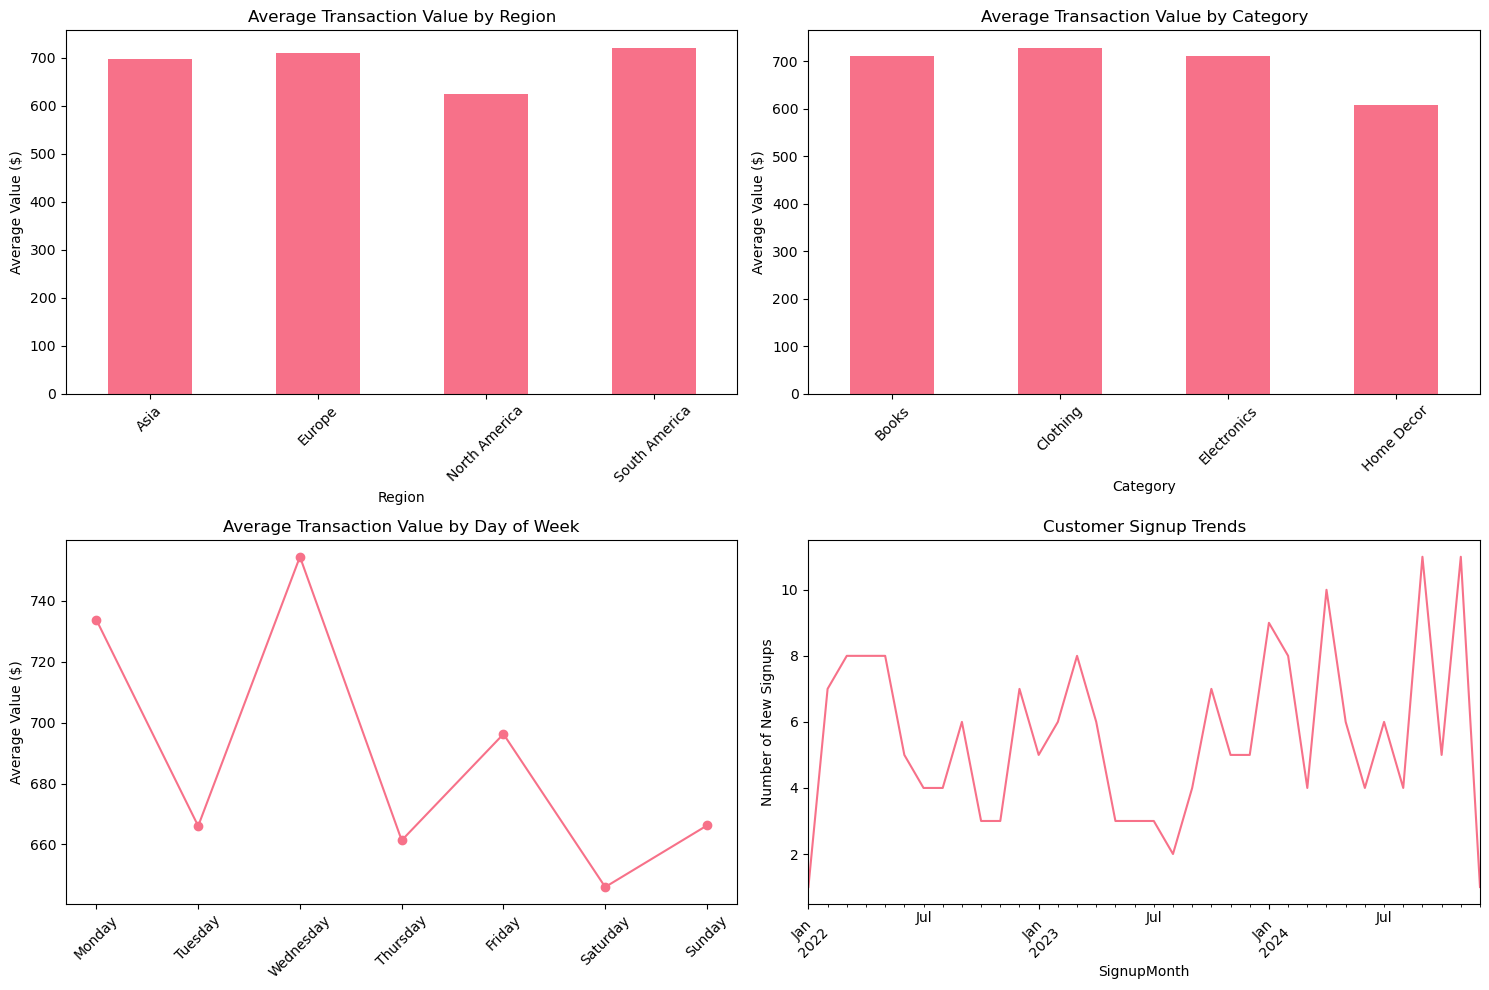

In [11]:
customers_df, products_df, transactions_df = load_data()
create_report_visualizations(customers_df, products_df, transactions_df)